In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'price']
df = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Exploratory Data Analysis

<AxesSubplot:>

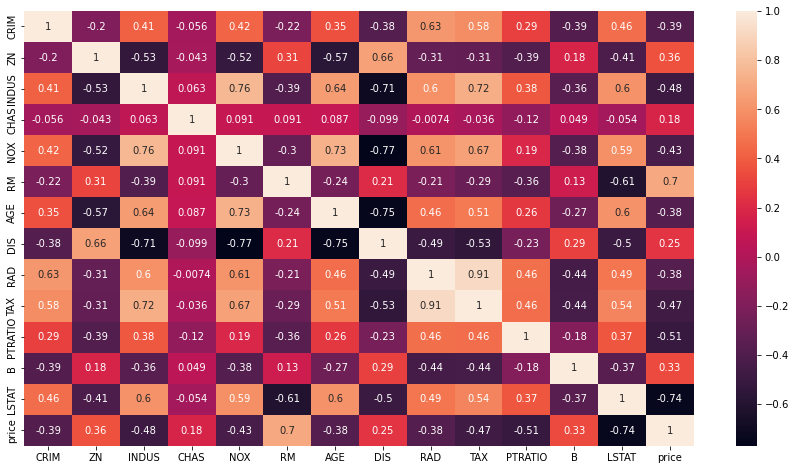

In [98]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='RM', ylabel='price'>

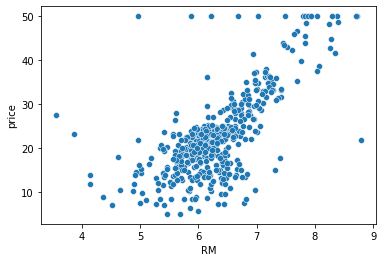

In [100]:
sns.scatterplot(data = df,x="RM",y = "price")

As number of rooms increases price also increases

<AxesSubplot:xlabel='LSTAT', ylabel='price'>

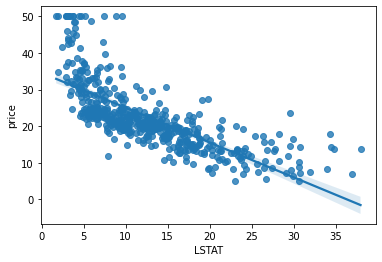

In [102]:
sns.regplot(data=df,x="LSTAT",y="price")

As LSTAT increases the price of the house decreases

<AxesSubplot:xlabel='PTRATIO', ylabel='price'>

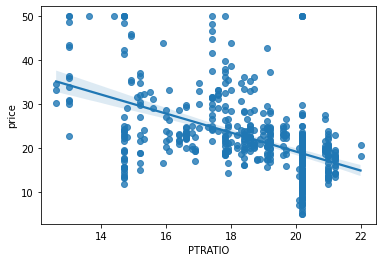

In [103]:
sns.regplot(data=df,x="PTRATIO",y="price")

As PTRATIO increses price decreases

In [3]:
x = df.drop("price",axis = 1)
y = df["price"]

In [4]:
import statsmodels.api as sm

In [5]:
xc = sm.add_constant(x)
xc

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [6]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          6.72e-135
Time:                        13:21:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Assumption 1: Multicollinearity

condition number >1000 indicates that there is high multicollinearity

In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Variance Inflation Factor(VIF)

Finding which variable has high multicollinearity with other predictor variables

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [9]:
vif = [VIF(xc.values,i) for i in range(xc.shape[1])]

In [10]:
vif_df = pd.DataFrame(vif,index = xc.columns,columns = ["VIF"])
vif_df

,VIF
const,585.265238
CRIM,1.792192
ZN,2.298758
INDUS,3.991596
CHAS,1.073995
NOX,4.393720
RM,1.933744
AGE,3.100826
DIS,3.955945
RAD,7.484496


In [11]:
xc1 = xc.drop("TAX",axis=1)
xc1

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


In [12]:
model1 = sm.OLS(y,xc1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.21e-133
Time:                        13:21:04   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6286      5.123      6.760      0.000      24.563      44.694
CRIM          -0.1067      0.033     -3.216      0.001      -0.172      -0.042
ZN             0.0364      0.014      2.692      0.007       0.010       0.063
INDUS         -0.0678      0.056     -1.214      0.225      -0.177       0.042
CHAS           3.0292      0.864      3.507      0.000       1.332       4.726
NOX          -18.7012      3.847     -4.862      0.000     -26.259     -11.143
RM             3.9117      0.421      9.294      0.000       3.085       4.739
AGE           -0.0006      0.013     -0.045      0.964      -0.027       0.026
DIS           -1.4883      0.201     -7.390      0.000      -1.884      -1.093
RAD            0.1346      0.041      3.262      0.001       0.054       0.216
PTRATIO       -0.9851      0.132     -7.478      0.000      -1.244      -0.726
B              0.0095      0.003      3.521      0.000       0.004       0.015
LSTAT         -0.5222      0.051    -10.198      0.000      -0.623      -0.422
==============================================================================
Omnibus:                      168.699   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              702.173
Skew:                           1.452   Prob(JB):                    3.35e-153
Kurtosis:                       7.987   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
vif = [VIF(xc1.values,i) for i in range(xc1.shape[1])]
vif_df = pd.DataFrame(vif,index = xc1.columns,columns = ["VIF"])
vif_df

,VIF
const,578.263970
CRIM,1.791940
ZN,2.184240
INDUS,3.226015
CHAS,1.058220
NOX,4.369271
RM,1.923075
AGE,3.098044
DIS,3.954446
RAD,2.837494


## Assumption 2: Linearity

### Linear rainbow test

h0: fit of the model using full sample is same as the subset

ha: fit of the model using full sample is not same as the subset

In [14]:
import statsmodels.stats.api as sms

In [15]:
sms.diagnostic.linear_rainbow(model)

(0.5808507639614261, 0.999988852262534)

In [16]:
#pval = 0.9
#sig = 0.05
#pval > sig
#H0 accepted
#fit of the model using full sample is same as the subset
#There is no evidence of non linearity in the residual

### Scatter plot b/w residual and predictors

In [17]:
residual = model.resid
residual

0      -6.003843
1      -3.425562
2       4.132403
3       4.792964
4       8.256476
         ...    
501    -1.133341
502    -1.775719
503    -3.727426
504    -4.127967
505   -10.444212
Length: 506, dtype: float64

In [18]:
import matplotlib.pyplot as plt

In [19]:
l = list(xc1.columns)

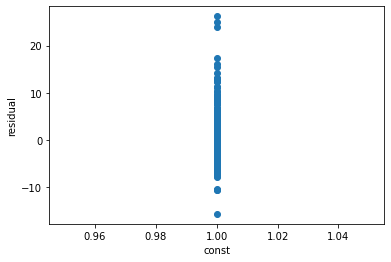

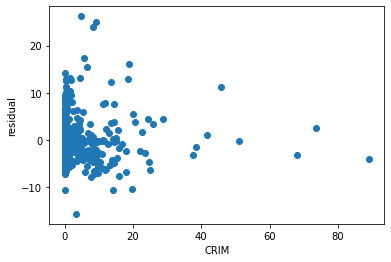

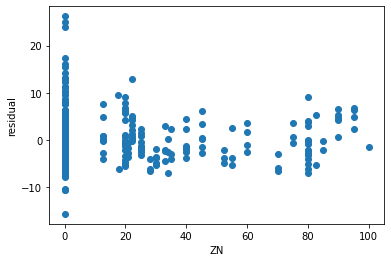

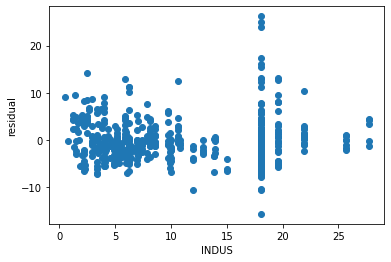

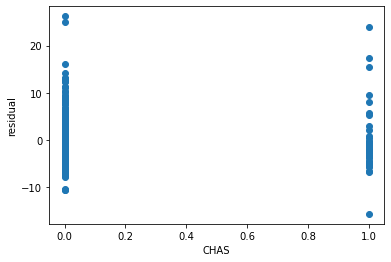

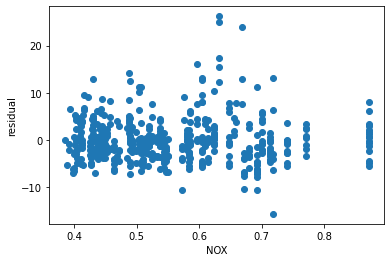

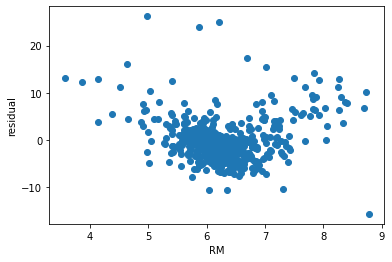

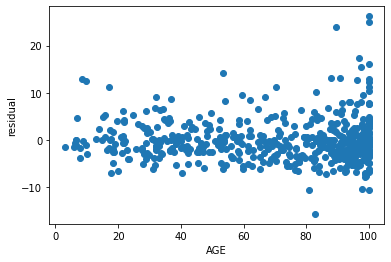

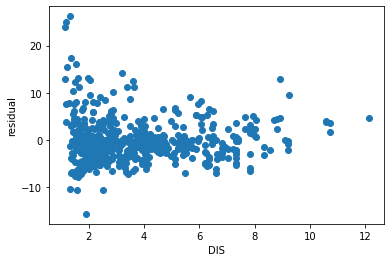

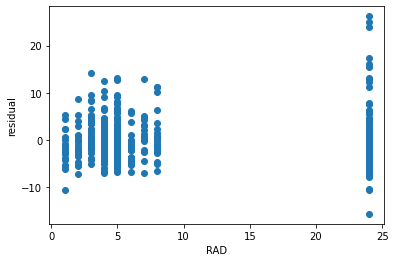

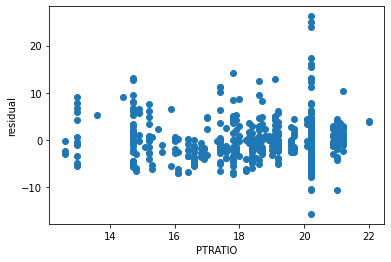

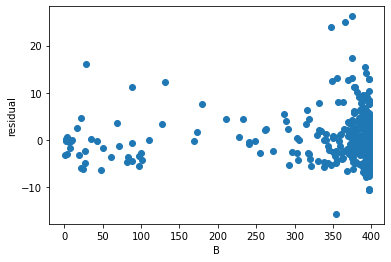

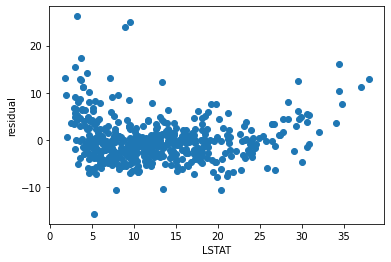

In [20]:
for i in l:
    plt.scatter(y = residual,x = xc1[i])
    plt.ylabel("residual")
    plt.xlabel(i)
    plt.show()

In [21]:
#scatter plot of ypred against residual

In [22]:
ypred = model1.predict(xc1)

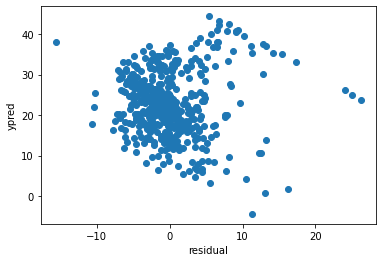

In [23]:
plt.scatter(y = ypred,x = residual)
plt.xlabel("residual")
plt.ylabel("ypred")
plt.show()

## Assumption 3: Autocorrelation

There should be no autocorrelation in the data. Value equal to 2 indicates no autocorrelation. Generally value from 1.5 to 2.5 is considered as no autocorrelation

In [24]:
from statsmodels.stats.stattools import durbin_watson

In [25]:
durbin_watson(residual)

1.078375118679724

## Assumption 4: Homoscedasticity

Goldfeld Quandt test

Breusch Pagan test

Any one of the test can be perfomed

#### Goldfeld Quandt test
H0: Error terms are Homoscedastic

Ha: Error terms are Heteroscedastic

In [26]:
sms.het_goldfeldquandt(y = residual,x = xc1)

(2.4354897949895036, 6.046581239284523e-12, 'increasing')

In [27]:
#pval = 0
#sig lev = 0.05
#pval < sig lev
#H0 rejected
#Error terms are Heteroscedastic

#### Breusch Pagan test
H0: Error terms are Homoscedastic

Ha: Error terms are Heteroscedastic

In [28]:
sms.het_breuschpagan(residual,xc1)

(64.96793040110339,
 2.7637441071983406e-09,
 6.051938905650977,
 6.304639240736293e-10)

In [29]:
#pval = 0
#sig lev = 0.05
#pval < sig lev
#H0 rejected
#Error terms are Heteroscedastic

## Assumption 5: Normality

Error terms should follow normal distribution. There are three test:

1. Quantile Quantile plot
2. Jarque-Bera test
3. Shapiro test



### QQ plot

<AxesSubplot:ylabel='Density'>

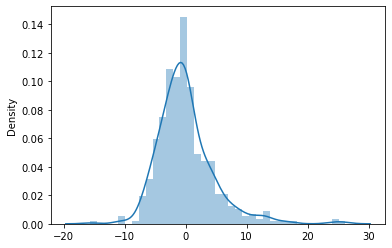

In [30]:
sns.distplot(residual)

In [31]:
import scipy.stats as stats

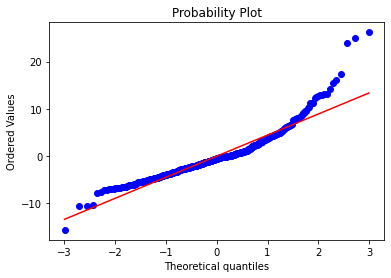

In [32]:
stats.probplot(residual,plot = plt)
plt.show()

### Shapiro test
H0: skew=0 Data is normal

Ha skew!=0 Data is not normal

In [33]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9013808369636536, pvalue=1.4802261404015972e-17)

In [34]:
#pval = 0 
#sig_lev = 0
#pval < sig_lev
# H0 rejected skew!=0 Data is not normal

### JB test
H0: skew = 0, kurtusis = 0

Ha: skew!=0, kurtosis !=0

In [35]:
stats.jarque_bera(residual)

Jarque_beraResult(statistic=783.1262780507689, pvalue=0.0)

In [36]:
#pval = 0 
#sig_lev = 0
#pval < sig_lev
# H0 rejected skew!=0, kurtosis !=0

### Feature Transformation
To reduce skew transforming the y variable

#### Log transformation

In [37]:
logy = np.log(y)

In [38]:
model_log = sm.OLS(logy,xc1).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     147.6
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.52e-154
Time:                        13:21:06   Log-Likelihood:                 120.88
No. Observations:                 506   AIC:                            -215.8
Df Residuals:                     493   BIC:                            -160.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0092      0.206     19.427      0.000       3.604       4.415
CRIM          -0.0102      0.001     -7.635      0.000      -0.013      -0.008
ZN             0.0007      0.001      1.217      0.224      -0.000       0.002
INDUS         -0.0020      0.002     -0.896      0.371      -0.006       0.002
CHAS           0.1183      0.035      3.399      0.001       0.050       0.187
NOX           -0.8258      0.155     -5.329      0.000      -1.130      -0.521
RM             0.0960      0.017      5.662      0.000       0.063       0.129
AGE            0.0001      0.001      0.270      0.788      -0.001       0.001
DIS           -0.0497      0.008     -6.130      0.000      -0.066      -0.034
RAD            0.0056      0.002      3.350      0.001       0.002       0.009
PTRATIO       -0.0399      0.005     -7.521      0.000      -0.050      -0.029
B              0.0004      0.000      3.895      0.000       0.000       0.001
LSTAT         -0.0289      0.002    -14.012      0.000      -0.033      -0.025
==============================================================================
Omnibus:                       53.184   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.599
Skew:                           0.391   Prob(JB):                     1.01e-44
Kurtosis:                       6.000   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### SQRT transformation

In [39]:
y_sqrt = np.sqrt(y)
model_sqrt = sm.OLS(y_sqrt,xc1).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     136.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          2.59e-148
Time:                        13:21:06   Log-Likelihood:                -313.28
No. Observations:                 506   AIC:                             652.6
Df Residuals:                     493   BIC:                             707.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4153      0.487     13.180      0.000       5.459       7.372
CRIM          -0.0165      0.003     -5.230      0.000      -0.023      -0.010
ZN             0.0027      0.001      2.086      0.038       0.000       0.005
INDUS         -0.0062      0.005     -1.162      0.246      -0.017       0.004
CHAS           0.2924      0.082      3.563      0.000       0.131       0.454
NOX           -1.9346      0.365     -5.294      0.000      -2.653      -1.217
RM             0.3157      0.040      7.896      0.000       0.237       0.394
AGE        -1.437e-05      0.001     -0.011      0.991      -0.003       0.002
DIS           -0.1359      0.019     -7.104      0.000      -0.174      -0.098
RAD            0.0133      0.004      3.397      0.001       0.006       0.021
PTRATIO       -0.0977      0.013     -7.807      0.000      -0.122      -0.073
B              0.0010      0.000      3.895      0.000       0.000       0.002
LSTAT         -0.0601      0.005    -12.343      0.000      -0.070      -0.050
==============================================================================
Omnibus:                      111.680   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.128
Skew:                           1.030   Prob(JB):                     5.10e-75
Kurtosis:                       6.462   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Box-cox transformation

In [40]:
boxcox_y, lam = stats.boxcox(y)
boxcox_model = sm.OLS(boxcox_y,xc1).fit()
boxcox_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     145.4
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          2.55e-153
Time:                        13:21:06   Log-Likelihood:                -210.99
No. Observations:                 506   AIC:                             448.0
Df Residuals:                     493   BIC:                             502.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0327      0.398     15.171      0.000       5.251       6.814
CRIM          -0.0169      0.003     -6.579      0.000      -0.022      -0.012
ZN             0.0017      0.001      1.617      0.106      -0.000       0.004
INDUS         -0.0045      0.004     -1.037      0.300      -0.013       0.004
CHAS           0.2350      0.067      3.505      0.000       0.103       0.367
NOX           -1.6064      0.299     -5.380      0.000      -2.193      -1.020
RM             0.2196      0.033      6.721      0.000       0.155       0.284
AGE            0.0001      0.001      0.116      0.907      -0.002       0.002
DIS           -0.1038      0.016     -6.643      0.000      -0.135      -0.073
RAD            0.0109      0.003      3.399      0.001       0.005       0.017
PTRATIO       -0.0792      0.010     -7.740      0.000      -0.099      -0.059
B              0.0008      0.000      3.960      0.000       0.000       0.001
LSTAT         -0.0533      0.004    -13.405      0.000      -0.061      -0.045
==============================================================================
Omnibus:                       75.443   Durbin-Watson:                   1.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.120
Skew:                           0.700   Prob(JB):                     7.92e-50
Kurtosis:                       5.961   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
sms.het_breuschpagan(residual,xc1)

(64.96793040110339,
 2.7637441071983406e-09,
 6.051938905650977,
 6.304639240736293e-10)

# SK Learn model building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [107]:
xc_f = xc1.drop("const",axis=1)

In [109]:
sc = StandardScaler() 
x_sc = pd.DataFrame(sc.fit_transform(xc_f),columns=xc_f.columns)
x_sc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,1.176466,0.403225,-0.865302


In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sc,y,test_size = 0.30,random_state=100)

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred_lr = lr.predict(xtest) 

### Model Evaluation

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
mae = mean_absolute_error(ytest,ypred_lr)
mse = mean_squared_error(ytest,ypred_lr)
rmse = np.sqrt(mse)
r2s = r2_score(ytest,ypred_lr)
print("MAE",mae)
print("MSE",mse)
print("RMSE",rmse)
print("R2 Score",r2s)

MAE 3.512145415435888
MSE 30.11964111705717
RMSE 5.4881363974537996
R2 Score 0.7026247170582368


In [115]:
#B1...Bn coeff
lr.coef_

array([-0.66236056,  0.66945754, -0.77509627,  0.77111894, -1.67637623,
        2.79037984, -0.39398951, -2.97731127,  0.76404176, -2.06437453,
        0.98668378, -3.02707381])

In [116]:
#B0
lr.intercept_

22.47678918267905